## ML Model

In [37]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter('ignore')

In [38]:
df = pd.read_csv("../data/preprocessed_credit_data.csv")

In [39]:
df.shape

(112633, 12)

In [40]:
X = df.drop("person_90_days_past", axis=1)

In [41]:
y = df["person_90_days_past"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 14)

#### - Logistic Regression

- Regression needs standarized features

In [43]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

- Fit the model with predictions

In [44]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

- This is a classifier that distinguishes if a borrower will have a 90 days past due or worse

In [45]:
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10639
           1       0.55      0.10      0.17       625

    accuracy                           0.95     11264
   macro avg       0.75      0.55      0.57     11264
weighted avg       0.93      0.95      0.93     11264

Confusion Matrix: 
[[10587    52]
 [  561    64]]


- Under ROC Curve

In [46]:
y_pred_prob = model.predict_proba(X_test_std)
y_pred_prob = [p[1] for p in y_pred_prob]
print(f"Score = {np.round(roc_auc_score(y_test, y_pred_prob), 2)}")

Score = 0.84


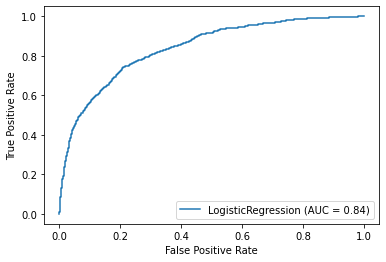

In [47]:
plot_roc_curve(model, X_test_std, y_test)

In [ ]:
from sklearn.metrics import average_precision_score

average_precision_score(y_true, y_pred_pos)

- Let's use parameter class_weight that should help more accurate

In [20]:
model_1 = LogisticRegression(solver='liblinear', class_weight='balanced')
model_1.fit(X_train_std, y_train)
y_pred_1 = model_1.predict(X_test_std)
print(f"Classification Report: \n{classification_report(y_test, y_pred_1)}\n")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_1)}\n")

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     10639
           1       0.17      0.75      0.28       625

    accuracy                           0.78     11264
   macro avg       0.58      0.77      0.57     11264
weighted avg       0.94      0.78      0.84     11264


Confusion Matrix: 
[[8351 2288]
 [ 157  468]]



- Under ROC curve

In [21]:
y_pred_prob_1 = model_1.predict_proba(X_test_std)
y_pred_prob_1 = [p[1] for p in y_pred_prob_1]
print(f"Score = {np.round(roc_auc_score(y_test, y_pred_prob_1), 2)}")

Score = 0.84


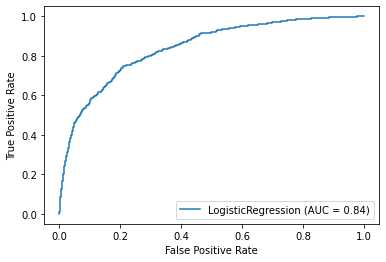

In [22]:
plot_roc_curve(model_1, X_test_std, y_test)

- The number of Type II errors decreased but increased a lot the type I errors
- It seems we need to move on to something different. We cannot see a notable improvement
- In fact, the model is worse than previous
- Let's implement ***class_weight*** manually

In [23]:
df['person_90_days_past'].value_counts(normalize = True)

0    0.945052
1    0.054948
Name: person_90_days_past, dtype: float64

In [26]:
weights = {0 : '0.945052', 1 : '0.054948'}
model_2 = LogisticRegression(class_weight=weights, solver='liblinear')
model_2.fit(X_train_std, y_train)
y_pred_2 = model_2.predict(X_test_std)
print(f"Classification Report: \n{classification_report(y_test, y_pred_2)}\n")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_2)}\n")

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10639
           1       0.00      0.00      0.00       625

    accuracy                           0.94     11264
   macro avg       0.47      0.50      0.49     11264
weighted avg       0.89      0.94      0.92     11264


Confusion Matrix: 
[[10639     0]
 [  625     0]]



- Now we had an improvement over errors type 1 (FP)

In [ ]:
# Under ROC curve
y_pred_prob_2 = model_2.predict_proba(X_test_std)
y_pred_prob_2 = [p[1] for p in y_pred_prob_2]
print(f"Score = {np.round(roc_auc_score(y_test, y_pred_prob_2), 2)}")

In [ ]:
plot_roc_curve(model_2, X_test_std, y_test)

#### - Another Improvements:
    - One improvement would be to do a GridSearch over weights params.
    - Another method could be up(down)sampling. As the problem with our data set, is that algorithms see drastically more negative (zero) cases than positive during the training stage, and it makes the models less accurate.

